In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn)
data.head()

,index,crypto,time,open,high,low,close,volume,trade
0,0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
data = data.drop(labels=["index"], axis=1)
data

,crypto,time,open,high,low,close,volume,trade
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700
...,...,...,...,...,...,...,...,...
6024,solana_usdt,1.637798e+09,205.76000000,216.35000000,201.93000000,209.97000000,1764837.19000000,886350.87000000
6025,solana_usdt,1.637885e+09,209.94000000,210.53000000,182.70000000,192.42000000,2776105.44000000,1241556.23000000
6026,solana_usdt,1.637971e+09,192.37000000,199.39000000,190.61000000,192.74000000,1028955.27000000,500367.73000000
6027,solana_usdt,1.638058e+09,192.74000000,202.10000000,180.93000000,200.69000000,1560980.85000000,789804.92000000


In [5]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)

In [6]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [7]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [8]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000


In [9]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [10]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [11]:
# set the close price 14 day prior as another feature
projection = 14
ethereum_df["close(t-14)"] = ethereum_df["close"].shift(projection).astype(float)
ethereum_df

,open,high,low,close,volume,trade,close(t-14)
time,,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377,NaN
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012,NaN
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922,NaN
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141,NaN
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293,NaN
...,...,...,...,...,...,...,...
2021-11-25,4270.10,4550.00,4248.27,4524.85,445868.24340,231824.31930,4719.00
2021-11-26,4524.48,4551.00,3913.00,4041.20,720245.16120,348872.86610,4665.46
2021-11-27,4041.20,4183.66,4028.34,4095.29,275326.52020,136157.34820,4644.28


In [12]:
# insert column with the difference between 14 days ago and today
ethereum_df["14 day diff"] = ethereum_df["close"] - ethereum_df["close(t-14)"]
ethereum_df

,open,high,low,close,volume,trade,close(t-14),14 day diff
time,,,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377,NaN,NaN
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012,NaN,NaN
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922,NaN,NaN
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141,NaN,NaN
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-25,4270.10,4550.00,4248.27,4524.85,445868.24340,231824.31930,4719.00,-194.15
2021-11-26,4524.48,4551.00,3913.00,4041.20,720245.16120,348872.86610,4665.46,-624.26
2021-11-27,4041.20,4183.66,4028.34,4095.29,275326.52020,136157.34820,4644.28,-548.99


In [13]:
ethereum_df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
trade           0
close(t-14)    14
14 day diff    14
dtype: int64

In [14]:
#remove nan rows
ethereum_df= ethereum_df.dropna()
ethereum_df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
trade          0
close(t-14)    0
14 day diff    0
dtype: int64

In [15]:
# remove the last 14 rows from the data (days we want to predict)
X = ethereum_df[:-projection]

In [16]:
# Set our X features data by dropping our target
X = X.drop("close", axis=1)
X

,open,high,low,volume,trade,close(t-14),14 day diff
time,,,,,,,
2017-12-13,622.00,705.69,539.93,57694.18773,28508.57887,421.70,262.29
2017-12-14,683.98,747.60,630.50,60919.26902,30685.47276,427.43,252.33
2017-12-15,679.76,689.00,594.60,39778.16165,17125.09695,457.51,217.44
2017-12-16,673.75,712.00,669.22,26866.05330,12518.18939,457.63,225.18
2017-12-17,681.80,728.00,680.33,31398.44760,16831.51917,460.30,247.34
...,...,...,...,...,...,...,...
2021-11-11,4628.68,4779.00,4576.47,303688.97650,157894.35770,4286.02,432.98
2021-11-12,4719.00,4809.71,4507.85,461580.04150,233963.11590,4418.89,246.57
2021-11-13,4665.47,4707.60,4584.08,220720.66110,118424.28400,4322.68,321.60


In [17]:
# remove the last 14 rows from the data (days we want to predict)
y = ethereum_df[:-projection]

In [18]:
# Set y target
y = y["close"]
y

time
2017-12-13     683.99
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
               ...   
2021-11-11    4719.00
2021-11-12    4665.46
2021-11-13    4644.28
2021-11-14    4626.50
2021-11-15    4563.78
Name: close, Length: 1434, dtype: float64

LR: 1.000000 (0.000000)
Lasso: 0.902948 (0.061981)
Ridge: 0.393944 (0.515085)
RF: 0.324972 (0.938237)
XGBOOST: 0.311663 (0.944788)
NN: 0.994806 (0.001258)
KNN: -7.232724 (6.913284)
SVR: -11.848184 (13.981661)


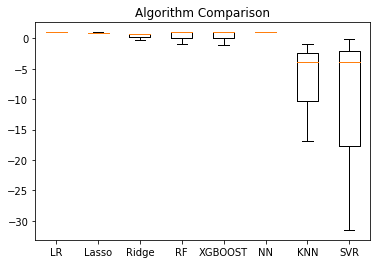

In [19]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We can see that Linear Regression, Lasso and NN models appear to perform the best. Serdar is already building a NN model, so we will dig further into Lasso.

Are Low R-squared Values Always a Problem?
No! Regression models with low R-squared values can be perfectly good models for several reasons.

Some fields of study have an inherently greater amount of unexplainable variation. In these areas, your R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes.

Fortunately, if you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables. Statistically significant coefficients continue to represent the mean change in the dependent variable given a one-unit shift in the independent variable. Clearly, being able to draw conclusions like this is vital.

In [20]:
# We need to set our training and testing data.
# We want all of the data except the last 14 days to train on, and we will test on the last 14 days, 
# excluding the last 14 days we removed to predict for.

#remove the last X (projection) number of days we want to predict for
X_train = ethereum_df[:-projection]
#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = X_train[:-30].drop("close",axis=1)


y_train = ethereum_df[:-projection]
y_train = y_train[:-30]
y_train = y_train["close"]
y_train

time
2017-12-13     683.99
2017-12-14     679.76
2017-12-15     674.95
2017-12-16     682.81
2017-12-17     707.64
               ...   
2021-10-12    3491.46
2021-10-13    3607.42
2021-10-14    3790.82
2021-10-15    3868.99
2021-10-16    3829.96
Name: close, Length: 1404, dtype: float64

In [21]:
# Our testing set will be the last 30 days excluding the dates we want to predict for.
X_test = ethereum_df[:-projection]
# Just the last 30 days
X_test = X_test[-30:].drop("close", axis=1)
X_test

y_test = ethereum_df[:-projection]
y_test = y_test[-30:]
y_test = y_test["close"]
y_test

time
2021-10-17    3846.85
2021-10-18    3744.96
2021-10-19    3877.03
2021-10-20    4161.15
2021-10-21    4052.99
2021-10-22    3972.20
2021-10-23    4167.12
2021-10-24    4082.33
2021-10-25    4220.37
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
2021-10-31    4287.21
2021-11-01    4319.43
2021-11-02    4589.89
2021-11-03    4603.35
2021-11-04    4532.32
2021-11-05    4474.24
2021-11-06    4518.00
2021-11-07    4612.59
2021-11-08    4807.98
2021-11-09    4732.33
2021-11-10    4628.78
2021-11-11    4719.00
2021-11-12    4665.46
2021-11-13    4644.28
2021-11-14    4626.50
2021-11-15    4563.78
Name: close, dtype: float64

In [22]:
model = Lasso(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.7086589051531149


In [23]:
unseen_data = ethereum_df[-projection:]
actual_values = unseen_data["close"].values
unseen_data = unseen_data.drop("close", axis=1)
unseen_data

,open,high,low,volume,trade,close(t-14),14 day diff
time,,,,,,,
2021-11-16,4563.77,4563.77,4103.00,735857.0630,354749.4963,4589.89,-380.13
2021-11-17,4209.59,4299.91,4063.48,472852.1842,230168.3863,4603.35,-315.55
2021-11-18,4288.07,4344.81,3956.44,576945.1837,271503.5573,4532.32,-535.42
2021-11-19,3996.90,4308.97,3973.01,420045.0897,220791.4006,4474.24,-179.48
2021-11-20,4294.75,4435.88,4199.86,365584.5780,184875.7626,4518.00,-105.83
2021-11-21,4412.17,4451.00,4242.41,340206.3203,163875.6246,4612.59,-354.28
2021-11-22,4259.70,4320.00,4022.74,518501.3338,252693.2206,4807.98,-722.01
2021-11-23,4086.28,4385.59,4059.62,502811.7902,257182.2577,4732.33,-392.89
2021-11-24,4339.45,4373.94,4167.65,448727.0306,224088.2362,4628.78,-359.42


In [24]:
predictions = model.predict(unseen_data)
data = pd.DataFrame()
data["actual"] = actual_values
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
0,4209.76,4215.969240,6.209240,0.147496
1,4287.80,4069.842843,-217.957157,-5.083193
2,3996.90,4039.531466,42.631466,1.066613
3,4294.76,4030.323313,-264.436687,-6.157194
4,4412.17,4201.411770,-210.758230,-4.776748
5,4258.31,4229.324073,-28.985927,-0.680691
6,4085.97,4059.750043,-26.219957,-0.641707
7,4339.44,4109.196472,-230.243528,-5.305835
8,4269.36,4155.986570,-113.373430,-2.655513
9,4524.85,4279.801045,-245.048955,-5.415626


In [25]:
print(data["difference (%)"].mean())

-2.9121459906921348


The model prediction is only off by -0.12% on average!

<AxesSubplot:>

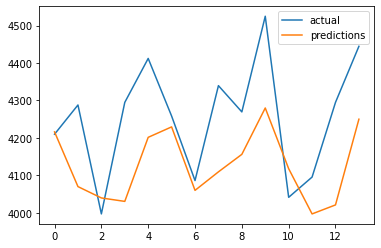

In [26]:
#plot chart
data.plot(y=["actual", "predictions"])

In [28]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("close",axis=1).columns.tolist()
data

,scores,features
0,0.00000,open
1,0.48116,high
2,0.48501,low
3,0.00000,volume
4,0.00000,trade
5,0.00000,close(t-14)
6,0.00000,14 day diff


<AxesSubplot:xlabel='features'>

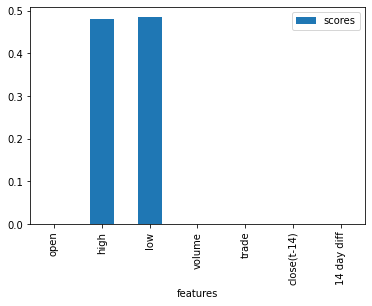

In [29]:
data.plot(kind="bar", x="features", y="scores")

it seems the low and the close are the most relevant features

In [30]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

1.0


In [33]:
unseen_data = ethereum_df[-projection:]
actual_values = unseen_data["close"].values
unseen_data = unseen_data.drop("close", axis=1)
unseen_data

,open,high,low,volume,trade,close(t-14),14 day diff
time,,,,,,,
2021-11-16,4563.77,4563.77,4103.00,735857.0630,354749.4963,4589.89,-380.13
2021-11-17,4209.59,4299.91,4063.48,472852.1842,230168.3863,4603.35,-315.55
2021-11-18,4288.07,4344.81,3956.44,576945.1837,271503.5573,4532.32,-535.42
2021-11-19,3996.90,4308.97,3973.01,420045.0897,220791.4006,4474.24,-179.48
2021-11-20,4294.75,4435.88,4199.86,365584.5780,184875.7626,4518.00,-105.83
2021-11-21,4412.17,4451.00,4242.41,340206.3203,163875.6246,4612.59,-354.28
2021-11-22,4259.70,4320.00,4022.74,518501.3338,252693.2206,4807.98,-722.01
2021-11-23,4086.28,4385.59,4059.62,502811.7902,257182.2577,4732.33,-392.89
2021-11-24,4339.45,4373.94,4167.65,448727.0306,224088.2362,4628.78,-359.42


In [34]:
predictions = model.predict(unseen_data)
data = pd.DataFrame()
data["actual"] = actual_values
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
0,4209.76,4209.76,-9.094947e-13,-2.160443e-14
1,4287.80,4287.80,0.000000e+00,0.000000e+00
2,3996.90,3996.90,-4.547474e-13,-1.137750e-14
3,4294.76,4294.76,0.000000e+00,0.000000e+00
4,4412.17,4412.17,0.000000e+00,0.000000e+00
5,4258.31,4258.31,0.000000e+00,0.000000e+00
6,4085.97,4085.97,-4.547474e-13,-1.112948e-14
7,4339.44,4339.44,-9.094947e-13,-2.095880e-14
8,4269.36,4269.36,0.000000e+00,0.000000e+00
9,4524.85,4524.85,0.000000e+00,0.000000e+00


In [35]:
print(data["difference (%)"].mean())

-9.229697403552548e-15


<AxesSubplot:>

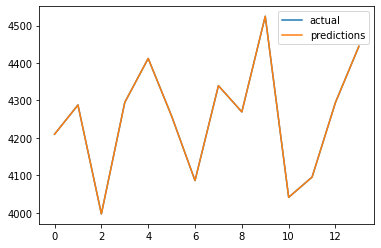

In [36]:
#plot chart
data.plot(y=["actual", "predictions"])

In [38]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("close",axis=1).columns.tolist()
data

,scores,features
0,0.000000e+00,open
1,8.020304e-16,high
2,-7.670335e-16,low
3,9.395367e-19,volume
4,-1.804821e-18,trade
5,1.000000e+00,close(t-14)
6,1.000000e+00,14 day diff


<AxesSubplot:xlabel='features'>

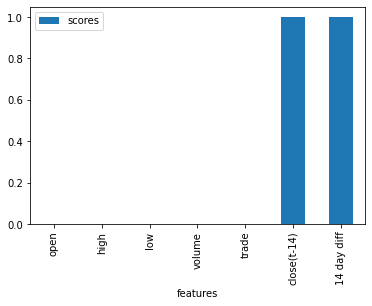

In [39]:
data.plot(kind="bar", x="features", y="scores")